# PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando o Python

Habilidades desenvolvidas: análise exploratória dos dados.

Profa. Regina Bernal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importar o arquivo amostra_pf.csv Trata-se de uma amostra de cadastro de uma empresa XYZ

In [ ]:
cadastro=pd.read_csv('C:cadastro.csv',sep=',')

In [ ]:
cadastro.info()

In [ ]:
cadastro.head()

In [ ]:
cadastro.dtypes

In [ ]:
cadastro.count()

In [ ]:
cadastro.nunique()

In [ ]:
cadastro.isna().sum()

In [ ]:
cadastro.isnull().sum()/len(cadastro)*100

## Análise descriva - Medidas resumo

In [ ]:
cadastro.describe().round(2) 

In [ ]:
Describe = cadastro.describe() 

In [ ]:
Describe = Describe.T

In [ ]:
Describe['CV'] = cadastro.std()/cadastro.mean() 

In [ ]:
Describe['CV'] = cadastro.std()/cadastro.mean() 

In [ ]:
Describe.round(2) 

In [ ]:
# Pergunta: Faz sentido apresentar a média, desvio padrão, quartil e coeficiente de variação para a variável CEP?

## Preprocessing
### Mudar o formato da variável

In [ ]:
# mudar o formato da variável number para string
cadastro['NUM_CPF'] = cadastro['NUM_CPF'].astype(str)
cadastro['CHAVE_CONTRATO'] = cadastro['CHAVE_CONTRATO'].astype(str)
cadastro['CEP'] = cadastro['CEP'].astype(str)
cadastro['CEP_A'] = cadastro['CEP_A'].astype(str)
cadastro['NUMERO'] = cadastro['NUMERO'].astype(str)
cadastro['LATITUDE'] = cadastro['LATITUDE'].astype(str)
cadastro['LONGITUDE'] = cadastro['LONGITUDE'].astype(str)
cadastro['CELULAR'] = cadastro['CELULAR'].astype(str)
cadastro['DDD_CELULAR'] = cadastro['DDD_CELULAR'].astype(str)
cadastro['CELULAR_2'] = cadastro['CELULAR_2'].astype(str)
cadastro['DDD_CELULAR_2'] = cadastro['DDD_CELULAR_2'].astype(str)
cadastro['COD_BANCO'] = cadastro['COD_BANCO'].astype(str)               
cadastro['NUM_AGENCIA'] = cadastro['NUM_AGENCIA'].astype(str)          
cadastro['NUM_CONTA'] = cadastro['NUM_CONTA'].astype(str)        
cadastro['CNPJ_CREDOR'] = cadastro['CNPJ_CREDOR'].astype(str)        
cadastro['STATUS_CONSENTIMENTO'] = cadastro['STATUS_CONSENTIMENTO'].astype(str)


In [ ]:
cadastro.describe().round(2) 

### Exploratory Data Analysis (EDA)

In [ ]:
plt.hist(cadastro['RENDA_PRESUMIDA'], bins=10)
plt.ylabel('Frequencia')
plt.xlabel('Renda presumida')
plt.title('Histograma da renda presumida')

In [ ]:
sns.distplot(cadastro['RENDA_PRESUMIDA'],kde=False,bins=30)

In [ ]:
sns.boxplot(y="RENDA_PRESUMIDA", data=cadastro)

In [ ]:
renda = cadastro[(cadastro['RENDA_PRESUMIDA'] < 10000) ]

In [ ]:
sns.boxplot(y="RENDA_PRESUMIDA", data=renda)

In [ ]:
plt.hist(renda['RENDA_PRESUMIDA'], bins=10)
plt.ylabel('Frequencia')
plt.xlabel('Renda presumida')
plt.title('Histograma da renda presumida')

In [ ]:
cadastroBackup = cadastro.copy()

## Análise de detecção de outliers usando o Box Plot
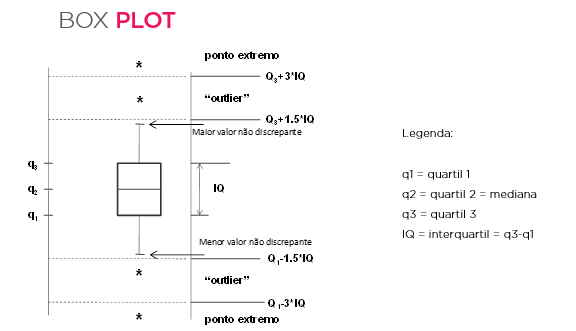

In [ ]:
################################################
########### ALGORITMO DO BOX PLOT   ############
################################################

import statistics

print('Quartil 1 (Q1) = ',np.percentile(cadastro['RENDA_PRESUMIDA'], 25))

print('Quartil 2 (Q2) = Mediana = ',statistics.median(cadastro['RENDA_PRESUMIDA'])) # / np.percentile(renda['RENDA_PRESUMIDA'], 50))

print('Quartil 3 (Q3) = ',np.percentile(cadastro['RENDA_PRESUMIDA'], 75))

print('Inter-quartil (IQ) = Q3 - Q1 = ',(np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)))

print('Limite 1 = Q3 + 3 * IQ = ',(np.percentile(cadastro['RENDA_PRESUMIDA'], 75) + 3 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25))))

print('Limite 2 = Q3 + 1.5 * IQ = ',(np.percentile(cadastro['RENDA_PRESUMIDA'], 75) + 1.5 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25))))

print('Limite 3 = Q1 - 1.5 * IQ = ',(np.percentile(cadastro['RENDA_PRESUMIDA'], 25) - 1.5 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25))))

print('Limite 4 = Q1 - 3 * IQ = ',(np.percentile(cadastro['RENDA_PRESUMIDA'], 25) - 3 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25))))
  
l1 = (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) + 3 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)))
l2 = (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) + 1.5 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)))
l3 = (np.percentile(cadastro['RENDA_PRESUMIDA'], 25) - 1.5 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)))
l4 = (np.percentile(cadastro['RENDA_PRESUMIDA'], 25) - 3 * (np.percentile(cadastro['RENDA_PRESUMIDA'], 75) - np.percentile(cadastro['RENDA_PRESUMIDA'], 25)))



### Medidas resumo da variável Renda presumida

In [ ]:
print('Mínimo = ', min(cadastro['RENDA_PRESUMIDA']))

print('Máximo = ', max(cadastro['RENDA_PRESUMIDA']))

print('Média = ', statistics.mean(cadastro['RENDA_PRESUMIDA']))

print('STD = ', cadastro['RENDA_PRESUMIDA'].std())

print('Coeficiente de Variação = ', (cadastro['RENDA_PRESUMIDA'].std() / cadastro['RENDA_PRESUMIDA'].mean()))

### Quantos outliers? Quantos pontos extremos?

In [ ]:
print('Outliers Inferior: ', cadastro.loc[(cadastro.RENDA_PRESUMIDA >= l2) & (cadastro.RENDA_PRESUMIDA <= l1), 'RENDA_PRESUMIDA'].count())
print('Outliers Superior: ', cadastro.loc[(cadastro.RENDA_PRESUMIDA >= l4) & (cadastro.RENDA_PRESUMIDA <= l3), 'RENDA_PRESUMIDA'].count())
print('Pontos Extremos: ', cadastro.loc[(cadastro.RENDA_PRESUMIDA >= l1) | (cadastro.RENDA_PRESUMIDA <= l4), 'RENDA_PRESUMIDA'].count())


### Criar a variável Renda_Outlier na base de dados

In [ ]:
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= l2) & (cadastro.RENDA_PRESUMIDA <= l1), 'Renda_Outlier'] = 1.0
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= l4) & (cadastro.RENDA_PRESUMIDA <= l3), 'Renda_Outlier'] = 1.0
cadastro.loc[(cadastro.RENDA_PRESUMIDA >= l1) | (cadastro.RENDA_PRESUMIDA <= l4), 'Renda_Outlier'] = 2.0
cadastro.loc[(cadastro.RENDA_PRESUMIDA < l2) & (cadastro.RENDA_PRESUMIDA > l3), 'Renda_Outlier'] = 0.0

In [ ]:
cadastro.head()

### Calcular a média recortada (sem os outliers e pontos extremos)

In [ ]:
################################################
########### REMOVER OS OUTLIERS ############
################################################

# Removendo os Outliers
cadastroSemOutlier = cadastro.loc[cadastro.Renda_Outlier == 0.0]

print('Mínimo = ', min(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Máximo = ', max(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('Média = ', statistics.mean(cadastroSemOutlier['RENDA_PRESUMIDA']))

print('STD = ', cadastroSemOutlier['RENDA_PRESUMIDA'].std())

print('Coeficiente de Variação = ', (cadastroSemOutlier['RENDA_PRESUMIDA'].std() / cadastroSemOutlier['RENDA_PRESUMIDA'].mean()))


In [ ]:
Exercício:

Use o arquivo cadastro e responda:
(1) Qual a renda média? Qual o desvio padrão da variável renda? Qual o coeficiente de variação da renda? 
    
(2) Criar a variável Renda_Outlier no arquivo de dados, sendo: 0 = não outilier, 1= outlier e 2= ponto extremo

(3) Quantos outliers? 

(4) Quantos pontos extremos? 

(5) Excluir os outliers e os pontos extremos. Recalcular a média, desvio padrão e coeficiente de variação da renda. A renda média é: 2489.8616304347825 O desvio padrão é: 517.4251707755458 Coeficiente de Variação: 0.20781282158446385

(6) Compare o resultado (1) e (5). Comente os resultados.


